In [ ]:
import pandas as pd 
import os

In [ ]:
#when we have a particular single file, we can fetch it from a code.
#but when it's scattered in a folder, it gets messy to work with.
#so we assign a proper address to each file so we can fetch it nicely from an address.
#then those nice file with their own address goes to a nice file


files_path = r"C:\Users\hp\Desktop\sales data"  #location of all the files
all_files = os.listdir(files_path)  #making all the files into a list ex: jan.csv, feb.csv to iterate over that list
combined_data = []  #to store the combined file
for file in all_files: #loop over the csvs
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(files_path, file)) #creating and feeding a proper address
        combined_data.append(df)  #sending it to another file

In [3]:
all_data = pd.concat(combined_data, ignore_index = True) #adding all the csvs together to work with all of them
all_data.tail(100)
all_data.to_csv("all_data.csv", index = False) #converting it into a csv file

### checking...

In [4]:
all_data.dtypes #to check the datatypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

###checking the fault

In [5]:
all_data.isnull().sum() #to check the number of null values present in the df

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data.duplicated().sum() #to check the number of duplicated values present in df


np.int64(1162)

In [7]:
all_data.describe() #for the description of the data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### cleaning>>>

In [95]:
nan_df = all_data[all_data.isna().any(axis=1)] #we are creating a new df to see the rows which are full of nan values. 
nan_df.head()                                #isna() checks the row with nan values
                                               #any(axis=1) "is any space empty?" 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute,grouped


In [98]:
all_data = all_data.dropna(how='all') #dropped all the nans rows

In [99]:
all_data.head() #this is the data without nan values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute,grouped
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46,USB-C Charging Cable
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30,Bose SoundSport Headphones
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27,Wired Headphones


In [11]:
all_data.isnull().sum() #checking id the null values still exists

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### fixing the dtypes of the columns

In [12]:
all_data["Order ID"] = pd.to_numeric(all_data["Order ID"], errors = "coerce") 
#pd.numeric() converts the value into numbers.
#if something can’t be turned into a number, make it NaN instead of throwing an error

In [13]:
all_data.dtypes 

Order ID            float64
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
dtype: object

In [14]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], errors="coerce") 

C:\Users\hp\AppData\Local\Temp\ipykernel_15940\3733727486.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], errors="coerce")


In [ ]:
all_data = all_data.dropna(subset=["Order Date"]) #we dropped the rows which has nan order id 


In [101]:
all_data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
SALES                      float64
MONTHS                       int32
city                        object
hour                         int32
minute                       int32
grouped                     object
dtype: object

In [19]:
all_data[all_data.duplicated()]  
#it shows the later duplicated row

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585.0,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
1302,177795.0,Apple Airpods Headphones,1,150,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1684,178158.0,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016"
3805,180207.0,Apple Airpods Headphones,1,150,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001"
4196,180576.0,Lightning Charging Cable,1,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001"
...,...,...,...,...,...,...
184940,257530.0,USB-C Charging Cable,1,11.95,2019-09-03 11:13:00,"192 Johnson St, San Francisco, CA 94016"
186173,258715.0,Lightning Charging Cable,1,14.95,2019-09-15 16:50:00,"550 10th St, Portland, OR 97035"
186508,259035.0,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016"
186782,259296.0,Apple Airpods Headphones,1,150,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"


In [20]:
all_data[all_data.duplicated(keep=False)]
#it shows all duplicates,even the first one

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30,176585.0,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
31,176585.0,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
1301,177795.0,Apple Airpods Headphones,1,150,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1302,177795.0,Apple Airpods Headphones,1,150,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1682,178158.0,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186508,259035.0,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016"
186781,259296.0,Apple Airpods Headphones,1,150,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"
186782,259296.0,Apple Airpods Headphones,1,150,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"
186784,259297.0,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"


In [21]:
all_data = all_data.drop_duplicates()
#removing the duplicates

In [22]:
all_data.shape

(185686, 6)

## Q1 WHAT WAS THE BEST MONTH FOR SALES? HOW MUCH EARNED THAT MONTH?


In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [24]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors = "coerce") #chnaging object to numeric
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors = "coerce")

In [25]:
all_data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [26]:
all_data["SALES"] = all_data["Quantity Ordered"] * all_data["Price Each"] #to see the total sales
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [27]:
def get_month(month): #made a fucntion
    return str(month).split("-")[1]  #it was a datetime sowe converted it into str then fetched the index1, you cannot split date so we converted it into string then split it amd fetched.
all_data["MONTHS"] = all_data["Order Date"].apply(lambda x: get_month(x))   
    

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04


In [29]:
#converting str into int32 again
all_data["MONTHS"] = all_data["MONTHS"].astype('int32') #from 04--> 4
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [30]:
month_sales = all_data.groupby('MONTHS')["SALES"].sum().reset_index() #its important to create a new df to dump the processed data. before reset index it was just a series with no columns
month_sales

,MONTHS,SALES
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

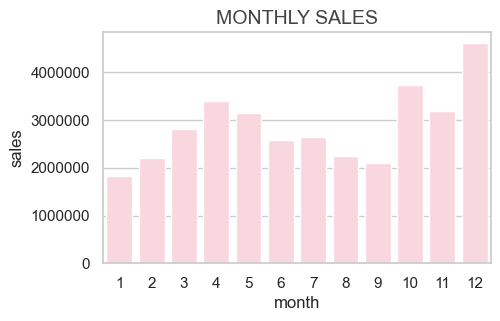

In [32]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(5,3))
sns.barplot(x = "MONTHS", y = month_sales['SALES'], data = month_sales,  color="#FFD1DC")
plt.title("MONTHLY SALES", fontsize = 14, color = "#444")
plt.xlabel("month", fontsize = 12)
plt.ylabel("sales", fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### what cities has the highest number of sales?


In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [35]:
def get_city(address):
    # Get the city (the second item after splitting by comma)
    return address.split(",")[1].strip()

def get_state(address):
    # Get the state abbreviation only (ignore ZIP code)
    state_part = address.split(",")[2].strip()  # "TX 75001"
    return state_part.split(" ")[0]  # Just "TX"

# Apply both functions to create a combined column
all_data["city"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))



In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [37]:
highest_sales = all_data.groupby('city')['SALES'].sum().reset_index()
highest_sales

,city,SALES
0,Atlanta GA,2794199.07
1,Austin TX,1818044.33
2,Boston MA,3658627.65
3,Dallas TX,2765373.96
4,Los Angeles CA,5448304.28
5,New York City NY,4661867.14
6,Portland ME,449321.38
7,Portland OR,1870010.56
8,San Francisco CA,8254743.55
9,Seattle WA,2745046.02


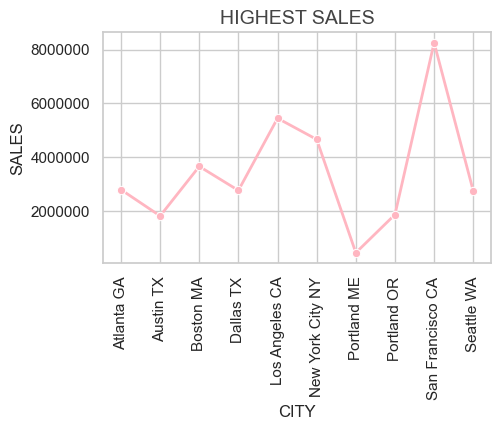

In [103]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.figure(figsize=(5,3))

# use sns.lineplot (not plt.lineplot)
sns.lineplot(x='city', y='SALES', data=highest_sales, color="#FFB6C1", marker='o', linewidth=2)

plt.title("HIGHEST SALES", fontsize=14, color="#444")
plt.xlabel("CITY", fontsize=12)
plt.ylabel("SALES", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='vertical')
plt.show()


### what time should we display advertisement to maximize the likelihood of customer's buying product?

In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [118]:
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute,grouped
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46,USB-C Charging Cable
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30,Bose SoundSport Headphones
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27,Wired Headphones


In [ ]:
#“Hey Python, show me each hour’s data one by one.
#I’ll decide what I want to do with it.”
#for hour, df in all_data.groupby('Hour'):
#   print(hour, df['Sales'].mean())


#"Hour" = the time (like 9, 10, 11...)

#"df" = all the rows from that hour

#Then you can do anything with that hour’s data —
#like find the average, make a graph, or check what people bought most.

#💬 Easy way to remember:
#Type	What it does	Example use
#🧮 Normal groupby	Does all the work and gives you the final table	“Tell me total sales per hour”
#🎨 Loop groupby	Gives you each group one by one so you can play with it	“Let me make a graph for each hour”

In [ ]:
#for class_name, group in students.groupby('Class'):
#   print(class_name)
#students.groupby('Class') groups all rows by the column Class
#The loop goes through each group one by one
#class_name stores the name of the group (like 6, 7, 8)
#group stores the mini DataFrame for that class (but here we’re not printing it)

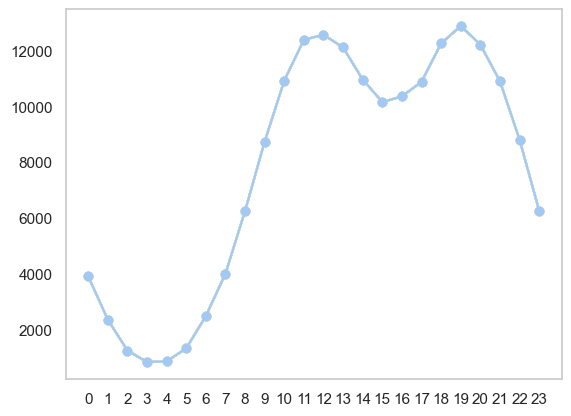

In [148]:
hours = [hour for hour, df in all_data.groupby('hour')]

plt.plot(hours, all_data.groupby('hour').count(), marker='o')
plt.xticks(hours)
plt.grid()
plt.show()


### what product are most often sold together

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27


In [51]:
all_data['grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

In [60]:
for row in all_data['grouped']:
    if isinstance(row, str):
        row_list = row.split(',')
        count.update(row_list)


In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute,grouped
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46,USB-C Charging Cable
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30,Bose SoundSport Headphones
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27,Wired Headphones


In [61]:
count.most_common(10)

[('USB-C Charging Cable', 48150),
 ('Lightning Charging Cable', 46938),
 ('AAA Batteries (4-pack)', 42752),
 ('AA Batteries (4-pack)', 42594),
 ('Wired Headphones', 41418),
 ('Apple Airpods Headphones', 33072),
 ('Bose SoundSport Headphones', 28300),
 ('iPhone', 17716),
 ('27in FHD Monitor', 15556),
 ('Google Phone', 14642)]

### what product sold the most? why do you think it sold the most

In [62]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute,grouped
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46,USB-C Charging Cable
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30,Bose SoundSport Headphones
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27,Wired Headphones


In [72]:
most_sold = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

In [73]:
most_sold.head()

,Product,Quantity Ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615


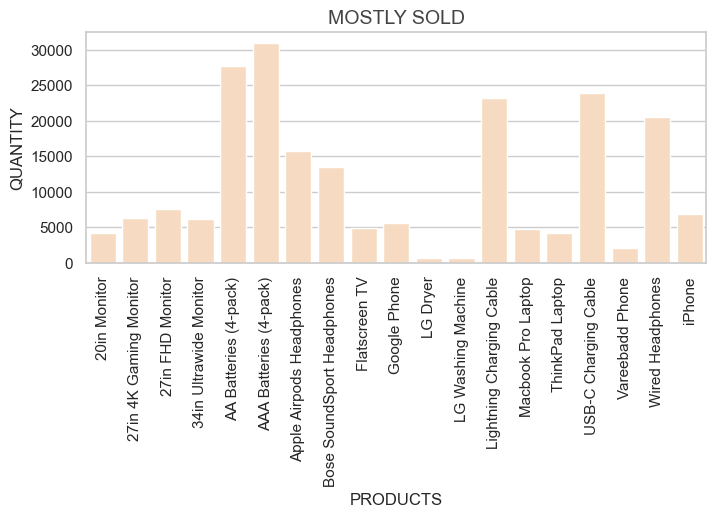

In [144]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(8,3))
sns.barplot(x = 'Product', y = 'Quantity Ordered', data = most_sold,  color="#FFDAB9")
plt.title("MOSTLY SOLD", fontsize = 14, color = "#444")
plt.xlabel("PRODUCTS", fontsize = 12)
plt.ylabel("QUANTITY", fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = "vertical")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15940\2083700180.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Price Each", data=all_data, palette="mako")


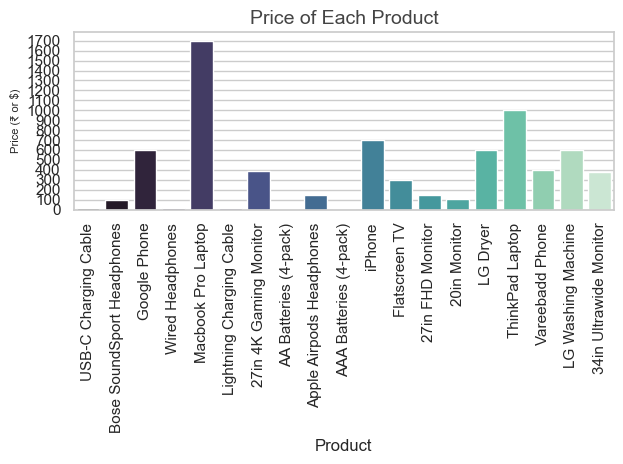

In [89]:
sns.barplot(x = "Product", y = "Price Each", data=all_data, palette="mako")
# Make it pretty

plt.title("Price of Each Product", fontsize=14, color="#444")
plt.xlabel("Product", fontsize=12)
plt.ylabel("Price (₹ or $)", fontsize=8)
plt.xticks(rotation=90)# Rotate names so they fit better
plt.yticks(range(0, int(all_data['Price Each'].max()) + 100, 100))
plt.tight_layout()       # Adjust spacing
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15940\2480566813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Price Each", data=filtered_data, palette="pastel")


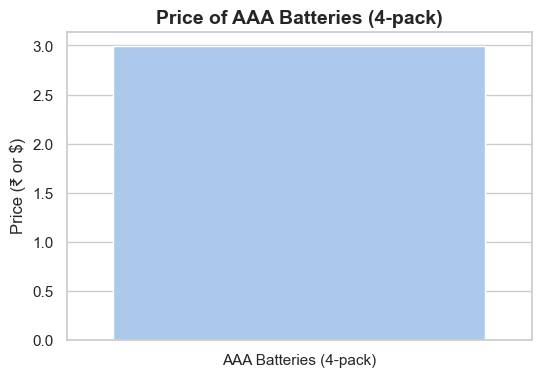

In [90]:
product_name = "AAA Batteries (4-pack)"   
filtered_data = all_data[all_data["Product"] == product_name]

plt.figure(figsize=(6, 4))
sns.barplot(x="Product", y="Price Each", data=filtered_data, palette="pastel")

plt.title(f"Price of {product_name}", fontsize=14, weight='bold')
plt.ylabel("Price (₹ or $)")
plt.xlabel("")
plt.show()


In [123]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SALES,MONTHS,city,hour,minute,grouped
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46,USB-C Charging Cable
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30,Bose SoundSport Headphones
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27,Wired Headphones
